In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [8]:
circuit = QuantumCircuit(2,2)

In [9]:
circuit.h(0)
circuit.cx(0,1)  # 0 -> control qbit, 1-> target qbit

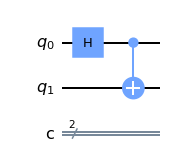

In [10]:
circuit.draw()

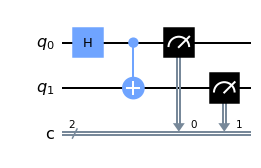

In [11]:
circuit.measure([0,1],[0,1])
circuit.draw()

In [12]:
simulator = Aer.get_backend('qasm_simulator')

In [15]:
from qiskit import execute
result = execute(circuit, backend = simulator).result()

In [16]:
result

Result(backend_name='qasm_simulator', backend_version='0.10.3', qobj_id='62a270d0-dd27-482d-ab6d-0041255da513', job_id='baf73e05-77e9-4865-8117-34168b2ea22e', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 530, '0x0': 494}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-3', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2497141440, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 2, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'fusion': {'enabled': False}}, time_taken=0.002414059)], date=2022-02-17T21:36:08.131197, status=COMPLETED, status=QobjHeader(ba

In [18]:
from qiskit.visualization import plot_histogram

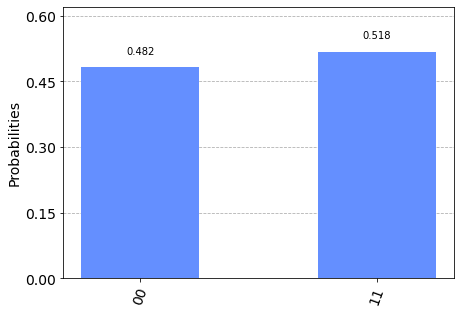

In [19]:
plot_histogram(result.get_counts(circuit))

In [20]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-02-17 21:55:39,484: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [21]:
provider = IBMQ.get_provider(hub="ibm-q")

In [23]:
quantum_computer = provider.get_backend('ibmq_belem')

In [28]:
import qiskit.tools.jupyter
%qiskit_job_watcher
result = execute(circuit, backend = quantum_computer)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [29]:
from qiskit.tools.monitor import job_monitor
job_monitor(result)

Job Status: job has successfully run


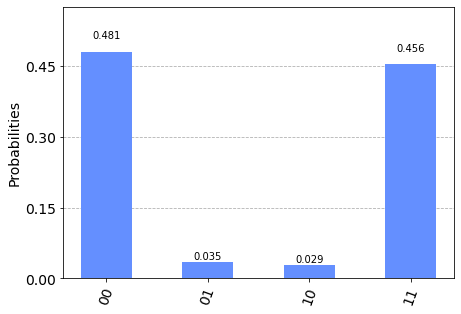

In [31]:
quantum_result = result.result()
plot_histogram(quantum_result.get_counts(circuit))

In [32]:
%qiskit_disable_job_watcher